In [114]:
import math
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'academic/graduate/courses/1. fall 2023/cs760/hw3/data'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
from numpy import genfromtxt
email_data_uncleaned = genfromtxt(GOOGLE_DRIVE_PATH + "/emails.csv", delimiter=',')

In [27]:
email_data = email_data_uncleaned[1:,1:]

In [68]:
class logistic_regression_classifier():
  def __init__(self, dataset, theta, b, learning_rate):
    self.dataset = dataset
    self.x = self.dataset[:, :-1].reshape(3001, -1)
    # print(self.x.shape)
    self.y = self.dataset[:, -1]
    self.theta = theta # initialize to 0s; 3000 vector
    self.b = b # 1 vector
    self.learning_rate = learning_rate


  def sigmoid(self, x):
    """
    x -- n x 3000 feature matrix
    """
    return 1 / (1 + np.exp(-x))


  def calculate_gradient(self):
    # print("shapes: ")
    # print(type(self.theta))
    # print((np.transpose(self.theta)).shape, self.x.shape, self.b)
    # print(np.dot(np.transpose(self.theta), self.x).shape)
    # print((np.dot(np.transpose(self.theta), self.x) + self.b).shape)
    dws = (1 / self.x.shape[1]) * np.dot((self.sigmoid(np.dot(np.transpose(self.theta), self.x) + self.b) - self.y), np.transpose(self.x))
    # print("dws: ", dws)
    db = (1 / self.x.shape[1]) * np.sum((self.sigmoid(np.dot(np.transpose(self.theta), self.x) + self.b) - self.y))
    # print("db: ", db)
    return dws, db


  def train(self, iterations):
    """
    x -- n x 3000 feature matrix
    y -- n x 1 label vector, one label per feature row
    """

    for i in range(iterations):
      # print("ITERATION ", i)
      # update theta and b by subtracting learning rate * gradient
      dws, db = self.calculate_gradient()
      # print(self.theta)
      # print(self.b)
      self.theta = self.theta - (self.learning_rate * np.transpose(dws))

      self.b = self.b - (self.learning_rate * db)


  def predict_w_probabilities(self, x):
    """
    x -- n x 3000 feature row
    returns  n x 1 class probabilities, one label per feature row
    """
    outcome = self.sigmoid(np.dot(x, self.theta) + self.b)

    return outcome


  def predict(self, x):
    """
    x -- n x 3000 feature row
    returns  n x 1 class probabilities, one label per feature row
    """
    probabilities = self.predict_w_probabilities(x)
    # print(probabilities.shape)

    y_pred = np.zeros((probabilities.shape[0],))
    # print("y_pred.shape: ", y_pred)
    # print(probabilities)

    for i in range(probabilities.shape[0]):
      if probabilities[i] > 0.5:
        y_pred[i] = 1
      else:
         y_pred[i] = 0
    return y_pred


  def evaluate(self, vector_with_predictions, test_set):
      """
      vector_with_predictions -- n x 1 prediction row
      test_set - n x 1 ground truth
      returns accuracy, precision, recall
      """
      true_negatives = 0
      true_positives = 0
      false_positives = 0
      false_negatives = 0

      for i in range(len(vector_with_predictions)):
        if vector_with_predictions[i] == 0:
          if vector_with_predictions[i] == test_set[i]:
            true_negatives += 1
          else:
            false_negatives += 1
        elif vector_with_predictions[i] == 1:
          if vector_with_predictions[i] == test_set[i]:
            true_positives += 1
          else:
            false_positives += 1

      accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
      precision = true_positives / (true_positives + false_positives)
      recall = true_positives / (true_positives + false_negatives)

      return accuracy, precision, recall


In [40]:
theta = np.zeros((3, 1))
lr_model = logistic_regression_classifier(np.array([[1, 3, 2, 1]]), theta, 0, 0.1)

lr_model.train(iterations=10)

In [56]:
np.ones((5000,)).shape

(5000,)

In [66]:
email_data.shape

(5000, 3001)

In [65]:
data_with_ones_col = np.append(email_data[:, :-1], np.ones((5000,1)), 1)
data_with_ones_col = np.append(data_with_ones_col, email_data[:, -1].reshape(5000,1), 1)
data_with_ones_col.shape

(5000, 3001)
(5000,)


(5000, 3002)

In [69]:
theta = np.zeros((3001, 1))
lr_model = logistic_regression_classifier(data_with_ones_col, theta, 0, 0.01)

In [70]:
lr_model.train(iterations=500)

In [ ]:
predictions = lr_model.predict(x=email_data[-10:, :-1])

# 2. Programming

## Question 3

In [80]:
set_1 = data_with_ones_col[:1000]
set_2 = data_with_ones_col[1000:2000]
set_3 = data_with_ones_col[2000:3000]
set_4 = data_with_ones_col[3000:4000]
set_5 = data_with_ones_col[4000:]

In [81]:
test_set_1 = set_1
train_set_1 = np.concatenate((set_2, set_3, set_4, set_5))

test_set_2 = set_2
train_set_2 = np.concatenate((set_1, set_3, set_4, set_5))

test_set_3 = set_3
train_set_3 = np.concatenate((set_1, set_2, set_4, set_5))

test_set_4 = set_4
train_set_4 = np.concatenate((set_1, set_2, set_3, set_5))

test_set_5 = set_5
train_set_5 = np.concatenate((set_1, set_2, set_3, set_4))

In [82]:
theta = np.zeros((3001, 1))
lr_model = logistic_regression_classifier(train_set_1, theta, 0, 0.001)
lr_model.train(iterations=500)

predictions = lr_model.predict(x=test_set_1[: ,:-1])

lr_model.evaluate(predictions, test_set_1[:, -1])

(0.715, 0.5, 0.0035087719298245615)

In [83]:
accuracy_score(predictions, test_set_1[:, -1])

0.715

In [84]:
theta = np.zeros((3001, 1))
lr_model = logistic_regression_classifier(train_set_2, theta, 0, 0.001)
lr_model.train(iterations=1000)

predictions = lr_model.predict(x=test_set_2[: ,:-1])

lr_model.evaluate(predictions, test_set_2[:, -1])

(0.724, 1.0, 0.0036101083032490976)

In [85]:
accuracy_score(predictions, test_set_2[:, -1])

0.724

In [86]:
theta = np.zeros((3001, 1))
lr_model = logistic_regression_classifier(train_set_3, theta, 0, 0.01)
lr_model.train(iterations=500)

predictions = lr_model.predict(x=test_set_3[: ,:-1])

lr_model.evaluate(predictions, test_set_3[:, -1])

(0.721, 1.0, 0.017605633802816902)

In [87]:
accuracy_score(predictions, test_set_3[:, -1])

0.721

In [88]:
theta = np.zeros((3001, 1))
lr_model = logistic_regression_classifier(train_set_4, theta, 0, 0.01)
lr_model.train(iterations=500)

predictions = lr_model.predict(x=test_set_4[: ,:-1])

lr_model.evaluate(predictions, test_set_4[:, -1])

(0.713, 0.8888888888888888, 0.027210884353741496)

In [89]:
accuracy_score(predictions, test_set_4[:, -1])

0.713

In [90]:
theta = np.zeros((3001, 1))
lr_model = logistic_regression_classifier(train_set_5, theta, 0, 0.01)
lr_model.train(iterations=500)

predictions = lr_model.predict(x=test_set_5[: ,:-1])

lr_model.evaluate(predictions, test_set_5[:, -1])

(0.697, 1.0, 0.00980392156862745)

In [91]:
accuracy_score(predictions, test_set_5[:, -1])

0.697

## Question 5

In [ ]:
# test_set_1 = set_1
# train_set_1 = np.concatenate((set_2, set_3, set_4, set_5))

In [96]:
def sortSecond(val):
    return val[0]

In [97]:
# copied over from kNN.ipynb

# this class works with data of the form (x1, x2, ..., x3000, y) where x1 ... x3000 are features and y is a class label

class kNN_classifier():
  def __init__(self, dataset):
    self.dataset = dataset

  def classify(self, k, x):
    """
    k -- # of nearest neighbors
    x -- 1 x 3000 feature row
    """

    # populate list with k -1s
    distances_with_label = []

    # calculate distance to x from every data point
    distances = np.sqrt(np.sum((self.dataset[:, :-1] - x)**2, axis=1))

    # append distance, label to list
    for i in range(len(self.dataset)):

      distances_with_label.append((distances[i], self.dataset[i][-1]))

    distances_with_label.sort(key=sortSecond)
    # print(distances_with_label[:k])

    # return majority vote
    knn = distances_with_label[:k]

    positive_count = 0
    negative_count = 0
    for i in range(len(knn)):
      if knn[i][-1] == 1:
        positive_count += 1
      elif knn[i][-1] == 0:
        negative_count += 1
    # if k == 10:
    #   print(knn)
    #   print("1" if positive_count >= negative_count else "0")
    return 1 if positive_count > negative_count else 0

  def evaluate(self, matrix_with_predictions, test_set):
    true_negatives = 0
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for i in range(len(matrix_with_predictions)):
      if matrix_with_predictions[i] == 0:
        if matrix_with_predictions[i] == test_set[i][-1]:
          true_negatives += 1
        else:
          false_negatives += 1
      elif matrix_with_predictions[i] == 1:
        if matrix_with_predictions[i] == test_set[i][-1]:
          true_positives += 1
        else:
          false_positives += 1

    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    return accuracy, precision, recall

In [192]:
my_classifier = kNN_classifier(train_set_2)
classifications = []
for i in range(len(test_set_2)):
  classifications.append(my_classifier.classify(5, test_set_2[i,:-1].reshape(1,-1)))
my_classifier.evaluate(classifications, test_set_2)

(0.85, 0.7068403908794788, 0.7833935018050542)

In [193]:
accuracy_score(np.array(classifications), test_set_2[:,-1])

0.85

In [194]:
knn_false_positive_rates, knn_true_positive_rates, thresholds = roc_curve(test_set_2[:, -1], classifications, pos_label=1, drop_intermediate=False)

In [195]:
knn_false_positive_rates, knn_true_positive_rates

(array([0.        , 0.12448133, 1.        ]),
 array([0.       , 0.7833935, 1.       ]))

In [203]:
theta = np.zeros((3001, 1))
lr_model = logistic_regression_classifier(train_set_2, theta, 0, 0.1)
lr_model.train(iterations=900)

predictions_w_probabilities = lr_model.predict_w_probabilities(x=test_set_2[: ,:-1])

predictions = lr_model.predict(x=test_set_2[: ,:-1])

# lr_model.evaluate(predictions, test_set_1[:, -1])

<ipython-input-68-a740141523a6>:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [204]:
accuracy_score(predictions, test_set_2[:,-1])

0.724

In [205]:
lr_false_positive_rates, lr_true_positive_rates, thresholds = roc_curve(test_set_2[:,-1], predictions_w_probabilities, pos_label=1)

In [206]:
lr_false_positive_rates.shape, lr_true_positive_rates.shape

((386,), (386,))

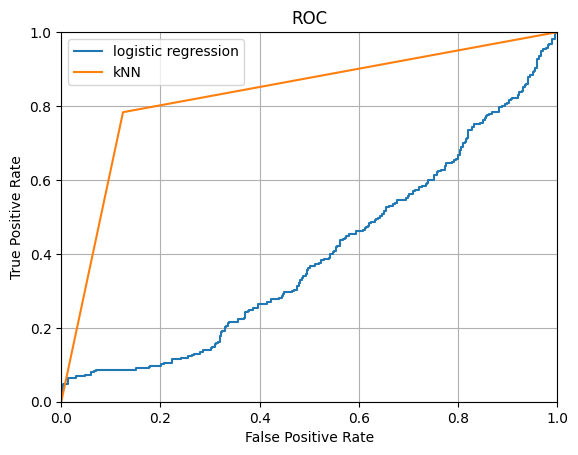

In [207]:
plt.plot(lr_false_positive_rates, lr_true_positive_rates, label = "logistic regression")
plt.plot(knn_false_positive_rates, knn_true_positive_rates, label = "kNN")

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.grid(True)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()